In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten

import time

from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
from pandas import DataFrame

In [16]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.boston_housing.load_data()


In [17]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [18]:
raw_train_x[0]


array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [21]:
raw_train_x[:,1]

array([  0. ,  82.5,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  70. ,
        82.5,   0. ,   0. ,  75. ,  95. ,  18. ,   0. ,   0. ,  12.5,
         0. ,   0. ,   0. ,  52.5,   0. ,   0. ,   0. ,  75. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,  20. ,   0. ,   0. ,   0. ,   0. ,  52.5,
         0. ,   0. ,   0. ,   0. ,  40. ,   0. ,   0. ,  20. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
        45. ,   0. ,   0. ,  12.5,   0. ,   0. ,  25. ,   0. ,   0. ,
        20. ,   0. ,  55. ,   0. ,   0. ,   0. ,  95. ,   0. ,   0. ,
         0. ,  95. ,   0. ,   0. ,   0. ,  30. ,  95. ,   0. ,  60. ,
         0. ,  20. ,   0. ,   0. ,   0. ,   0. ,  22. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  85. ,   0. ,   0. ,
        12.5,   0. ,  80. ,   0. ,   0. ,   0. ,  90. ,   0. ,   0. ,
         0. ,  45. ,

In [20]:
import numpy as np

np.max(raw_train_x[:,5])

8.725

In [43]:
train_x[:10]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01],
       [2.83920e-01, 0.00000e+

In [63]:
#정규화 


print("min=", np.min(test_x))
print("max=", np.max(test_x))
print("min=",np.min(train_y))
print("max=",np.max(train_y))


min = 0 # ADDED
max = 711 # ADDED

train_x = (train_x-min)/(max-min) # ADDED
test_x = (test_x-min)/(max-min) # ADDED
print(train_x)
print(test_x)
# min = 5 # ADDED
# max = 50 # ADDED

# raw_train_y = (raw_train_y-min)/(max-min) # ADDED
# raw_test_y = (raw_test_y-min)/(max-min) 


min= 0.0
max= 711.0
min= 5.0
max= 50.0
[[1.73343179e-03 0.00000000e+00 1.14486639e-02 ... 2.95358650e-02
  5.58227848e-01 2.63291139e-02]
 [3.06188467e-05 1.16033755e-01 2.85513361e-03 ... 2.06751055e-02
  5.56090014e-01 4.37412096e-03]
 [6.88919831e-03 0.00000000e+00 2.54571027e-02 ... 2.84106892e-02
  5.28157525e-01 4.58509142e-03]
 ...
 [4.87482419e-05 4.92264416e-02 8.52320675e-03 ... 2.37693390e-02
  5.09493671e-01 1.10126582e-02]
 [3.02275668e-03 0.00000000e+00 2.75386779e-02 ... 2.06751055e-02
  3.68424754e-01 2.22081575e-02]
 [2.02390999e-05 8.43881857e-02 4.12095640e-03 ... 2.19409283e-02
  5.29817159e-01 6.16033755e-03]]
[[2.54354430e-02 0.00000000e+00 2.54571027e-02 ... 2.84106892e-02
  3.83263010e-02 4.08579466e-02]
 [1.73403657e-04 0.00000000e+00 1.40787623e-02 ... 2.50351617e-02
  5.55485232e-01 2.27988748e-02]
 [7.73136428e-05 0.00000000e+00 7.29957806e-03 ... 2.84106892e-02
  5.58227848e-01 1.36990155e-02]
 ...
 [2.57914205e-03 0.00000000e+00 2.75386779e-02 ... 2.067510

In [70]:
mean = train_x.mean(axis=0)
train_x -= mean
std = train_x.std(axis=0)
train_x /= std

test_x -= mean
test_x /= std

In [64]:
print("min=", np.min(test_x))
print("max=", np.max(test_x))
print("min=",np.min(train_y))
print("max=",np.max(train_y))

min= 0.0
max= 1.0
min= 5.0
max= 50.0


1. 데이터들을 normalization
  각 feature별로 
  출력값  
2. DNN. 2 ->1 ..... 13->1 
3. metric. 'mae' 


요구사항
 - train_loss, val_loss 그래프 
 - test 데이터에 대한 mae 출력 

In [72]:
#DNN 학습
from keras import layers

model = keras.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(13,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])


start_time = time.time()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
print("elapsed : {}".format(time.time() - start_time))   

loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

elapsed : 354.83245062828064
4/4 [==============================] - 0s 3ms/step - loss: 12.1306 - mae: 2.5034
loss= 12.130602836608887
acc= 2.503378391265869
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [68]:
predicted[0]

0

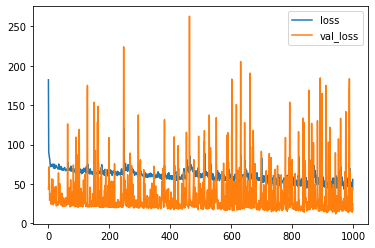

In [66]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [45]:
from tensorflow.keras.layers import BatchNormalization

4/4 [==============================] - 0s 4ms/step - loss: 572.0917 - mae: 22.1325
loss= 572.0916748046875
acc= 22.13252067565918
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


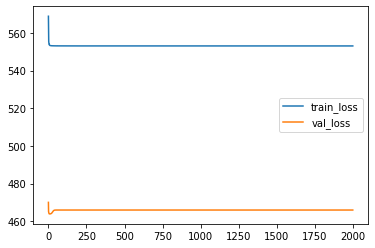

In [52]:
model = Sequential()
model.add(Dense(20, input_shape=(13,), activation='tanh'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(20, activation='tanh'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, batch_size=100,validation_split=0.1, epochs=2000, verbose=0)

loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='val_loss')
pyplot.legend()
pyplot.show()

(404, 13) (404,)
(102, 13) (102,)
Epoch 1/200
13/13 - 0s - loss: 191.9247 - mae: 10.7943
Epoch 2/200
13/13 - 0s - loss: 91.1521 - mae: 7.0988
Epoch 3/200
13/13 - 0s - loss: 74.8985 - mae: 6.4496
Epoch 4/200
13/13 - 0s - loss: 75.0750 - mae: 6.2690
Epoch 5/200
13/13 - 0s - loss: 70.7382 - mae: 6.0479
Epoch 6/200
13/13 - 0s - loss: 63.8609 - mae: 5.6011
Epoch 7/200
13/13 - 0s - loss: 64.0770 - mae: 5.8794
Epoch 8/200
13/13 - 0s - loss: 57.6802 - mae: 5.4600
Epoch 9/200
13/13 - 0s - loss: 57.7286 - mae: 5.5240
Epoch 10/200
13/13 - 0s - loss: 61.7191 - mae: 5.7028
Epoch 11/200
13/13 - 0s - loss: 55.3708 - mae: 5.2410
Epoch 12/200
13/13 - 0s - loss: 50.6562 - mae: 4.9817
Epoch 13/200
13/13 - 0s - loss: 52.1500 - mae: 5.1698
Epoch 14/200
13/13 - 0s - loss: 50.6086 - mae: 5.0729
Epoch 15/200
13/13 - 0s - loss: 44.9629 - mae: 4.5767
Epoch 16/200
13/13 - 0s - loss: 46.1598 - mae: 4.8631
Epoch 17/200
13/13 - 0s - loss: 48.0559 - mae: 4.8976
Epoch 18/200
13/13 - 0s - loss: 43.1337 - mae: 4.7090
E

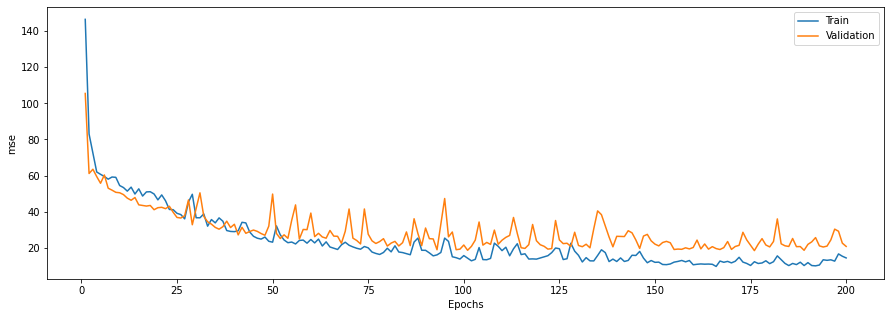

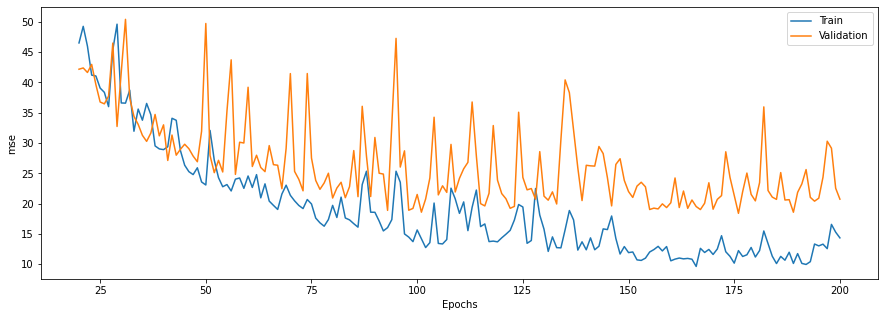

In [74]:
#블로그 

import pandas as pd
import numpy as np
import random
import tensorflow as tf

from sklearn import datasets

housing = datasets.load_boston()
X_data = housing.data
y_data = housing.target

# 피처 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)

X_data_scaled[0]

# 학습 - 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# MLP 모델 아키텍처 정의

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=num_input))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    return model

model = build_model(num_input=13)

# 미니 배치 학습
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=2)

# 모델 평가
model.evaluate(X_test, y_test)

# 교차 검증
model = build_model(num_input=13)
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.25, verbose=2)

y_ = model.predict(X_test)
predicted = np.argmax(y_, axis=1)

print(predicted)

# 
import matplotlib.pyplot as plt

def plot_loss_curve(total_epoch=10, start=1):
    plt.figure(figsize=(15, 5))
    plt.plot(range(start, total_epoch +1), history.history['loss'][start-1:total_epoch], label='Train')
    plt.plot(range(start, total_epoch +1), history.history['val_loss'][start-1:total_epoch], label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()
    
plot_loss_curve(total_epoch=200, start=1)

plot_loss_curve(total_epoch=200, start=20)